## Fashion MNIST (Entrega 1)

### Deep Learning: Fashion MNIST
- Bastian Fierro

- Daniel Santibañez

## 1. Carga de datos. Fashion-MNIST (5 puntos)

In [ ]:
# Importamos librerías necesarias

from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Cargamos datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = tf.keras.datasets.fashion_mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

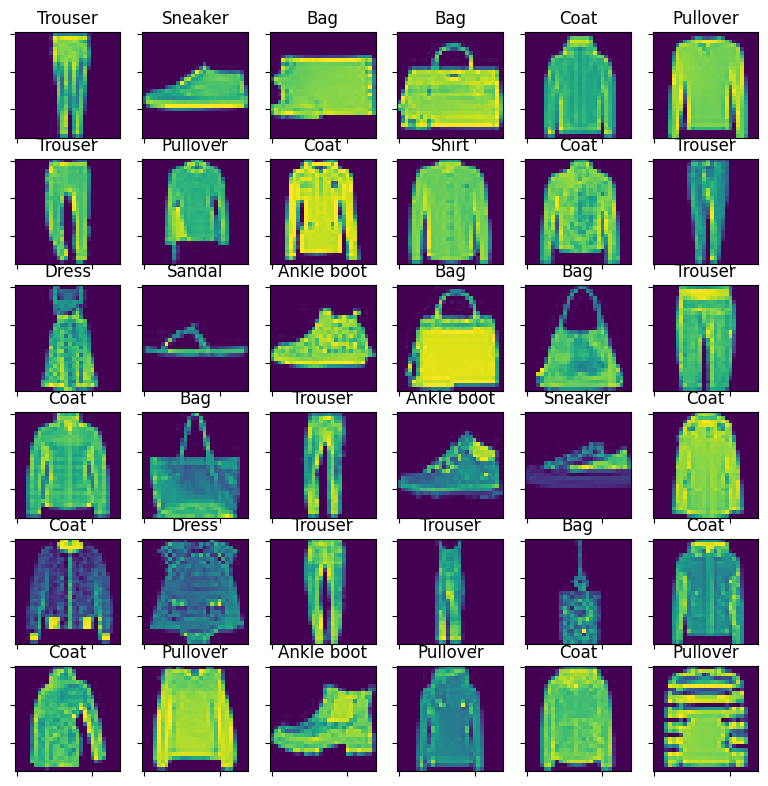

In [ ]:
# Mostramos una grilla de ejemplos (al azar) del conjunto de test

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [ ]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)


In [ ]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

784 10 60000 10000


In [ ]:
from tensorflow.python.framework.ops import NullContextmanager


## 2. Cree cinco modelos... (20 puntos)

modelos pequeños

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 16
h2 = 32

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist1 = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 2s 13ms/step - loss: 2.1579 - accuracy: 0.2270 - val_loss: 2.0319 - val_accuracy: 0.3279
Epoch 2/128
59/59 [==============================] - 1s 9ms/step - loss: 1.8814 - accuracy: 0.3657 - val_loss: 1.7353 - val_accuracy: 0.3965
Epoch 3/128
59/59 [============

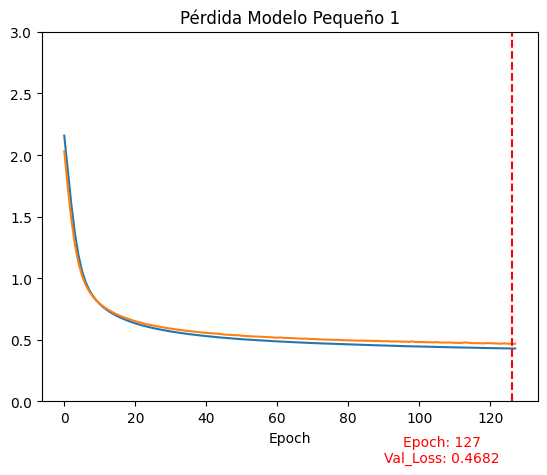

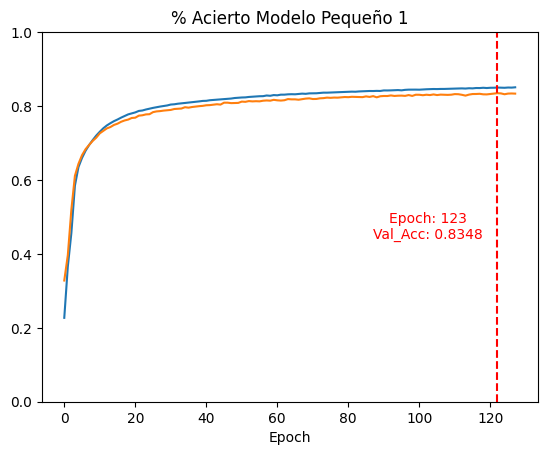

In [ ]:
XXXX = hist1

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Pequeño 1')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(-50,-85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Pequeño 1')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo pequeño 1 no cae en sobreajuste (overfitting) ni en infraajuste (underfitting) a simple vista y generaliza de forma adecuada.






In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 32
h2 = 64

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)


hist2 = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 2s 19ms/step - loss: 2.1590 - accuracy: 0.2496 - val_loss: 1.9713 - val_accuracy: 0.3860
Epoch 2/128
59/59 [==============================] - 1s 10ms/step - loss: 1.7809 - accuracy: 0.5213 - val_loss: 1.5972 - val_accuracy: 0.6051
Epoch 3/128
59/59 [===========

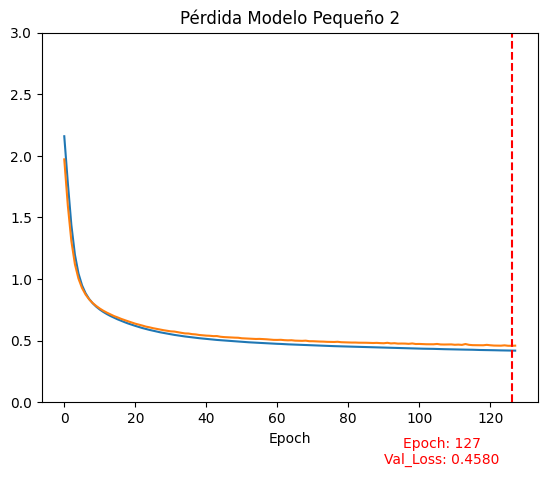

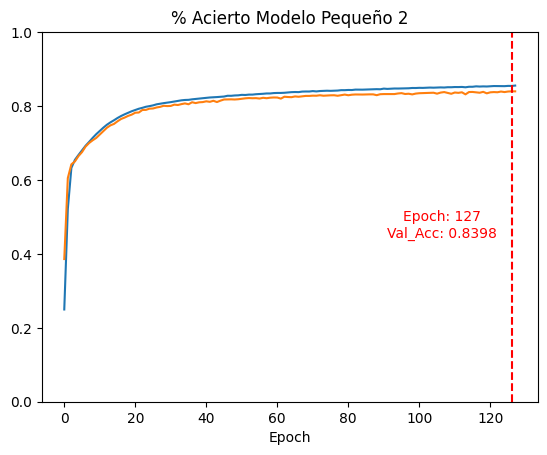

In [ ]:
XXXX = hist2

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Pequeño 2')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(-50,-85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Pequeño 2')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo pequeño 2 tampoco cae en sobreajuste (overfitting) ni en infraajuste (underfitting) a simple vista y generaliza de forma adecuada. Además, también tiene un poquito más de precisión de validación (validation accuracy) en comparación con el anterior.

modelos medianos

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 64
h2 = 128

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist3 = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 76,362
Trainable params: 76,362
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 2s 19ms/step - loss: 2.1799 - accuracy: 0.2340 - val_loss: 2.0035 - val_accuracy: 0.4450
Epoch 2/128
59/59 [=====================

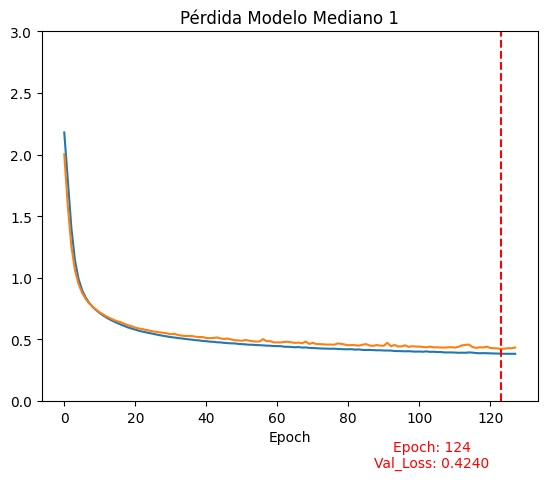

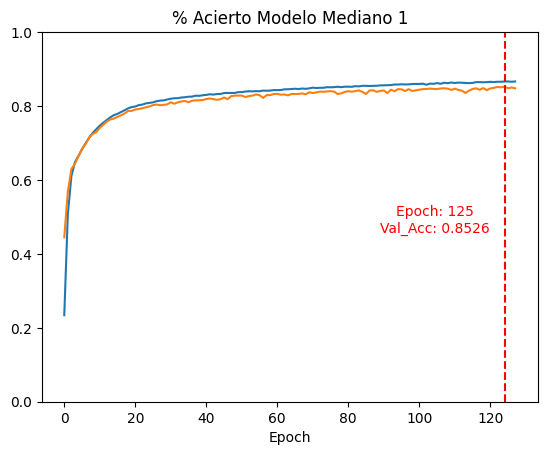

In [ ]:
XXXX = hist3

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Mediano 1')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(-50,-85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Mediano 1')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo mediano 1 tampoco cae en sobreajuste (overfitting) ni en infraajuste (underfitting) a simple vista y generaliza de forma adecuada. Además, también tiene un poquito más de precisión de validación (validation accuracy) en comparación con el anterior.

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 128
h2 = 256

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist4 = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 256)               33024     
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dense_26 (Dense)            (None, 10)                2570      
                                                                 
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 2s 32ms/step - loss: 2.0950 - accuracy: 0.3486 - val_loss: 1.8745 - val_accuracy: 0.5236
Epoch 2/128
59/59 [===================

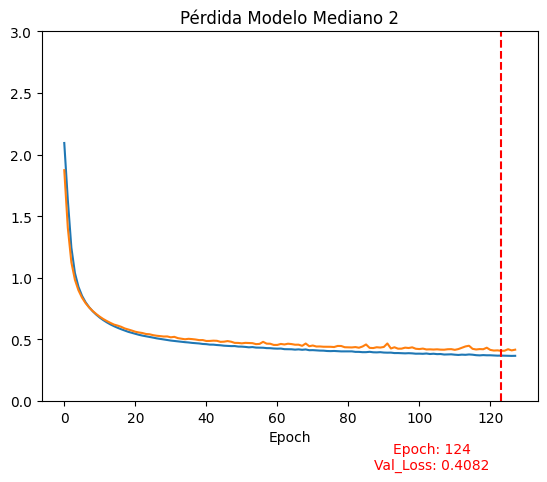

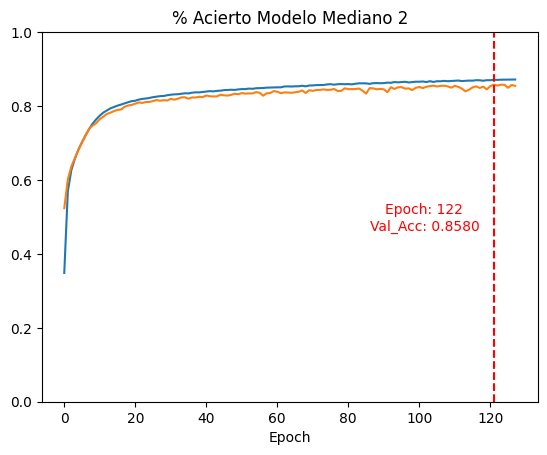

In [ ]:
XXXX = hist4

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Mediano 2')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(-50,-85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Mediano 2')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo mediano 2 tampoco cae en sobreajuste (overfitting) ni en infraajuste (underfitting) a simple vista y generaliza de forma adecuada. Además, también tiene un poquito más de precisión de validación (validation accuracy) en comparación con el anterior.

modelo grande

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 256
h2 = 512
h3 = 1024

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h3, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist5 = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 256)               200960    
                                                                 
 dense_28 (Dense)            (None, 512)               131584    
                                                                 
 dense_29 (Dense)            (None, 1024)              525312    
                                                                 
 dense_30 (Dense)            (None, 10)                10250     
                                                                 
Total params: 868,106
Trainable params: 868,106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 8s 125ms/step - loss: 2.0931 - accuracy: 0.3870 - val_loss: 1.8738 - val_accuracy: 0.5740
Epoch 2/128
59/59 [==================

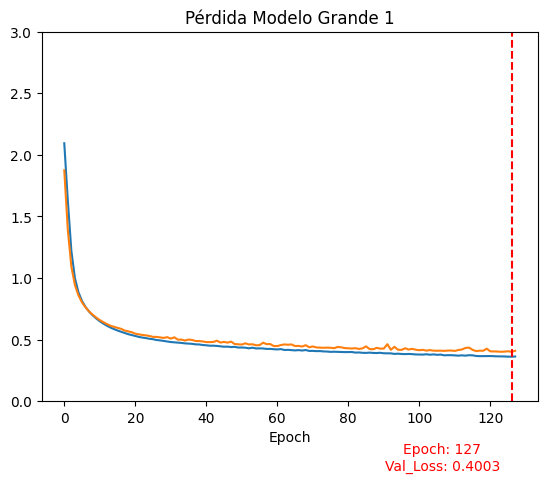

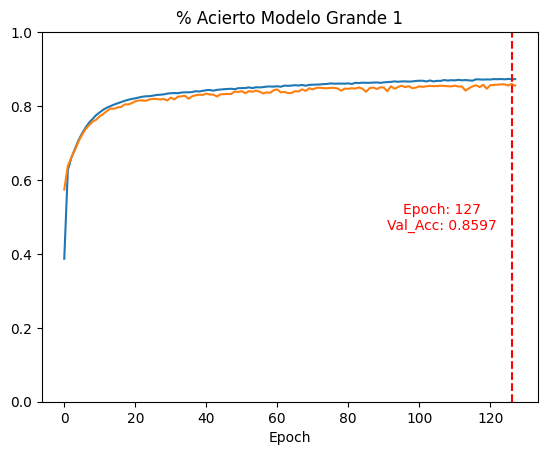

In [ ]:
XXXX = hist5

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Grande 1')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(-50,-85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Grande 1')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo grande 1 tampoco cae en sobreajuste (overfitting) ni en infraajuste (underfitting) a simple vista y generaliza de forma adecuada. Además, también tiene un poquito más de precisión de validación (validation accuracy) en comparación con el anterior.

En conclusión, aunque la diferencia en la cantidad de parámetros entre los modelos es considerable, la diferencia en el rendimiento es mínima. Por lo tanto, no resulta muy beneficioso utilizar modelos más grandes en este caso.






## 3. De las cinco arquitecturas anteriores... (25 puntos)

In [ ]:
from keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import tensorflow.keras.backend as K

In [ ]:
def mish(x):
    return x * K.tanh(K.softplus(x)); # Mish necesita definirse como función


Modelos pequeños

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 16
h2 = 32

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation=mish))
red.add(keras.layers.Dense(h2, activation=mish))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='Nadam',
    metrics=['accuracy']
)

hist1a = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 2s 15ms/step - loss: 1.3667 - accuracy: 0.5407 - val_loss: 0.8007 - val_accuracy: 0.7273
Epoch 2/128
59/59 [==============================] - 1s 11ms/step - loss: 0.6591 - accuracy: 0.7826 - val_loss: 0.6061 - val_accuracy: 0.7933
Epoch 3/128
59/59 [===========

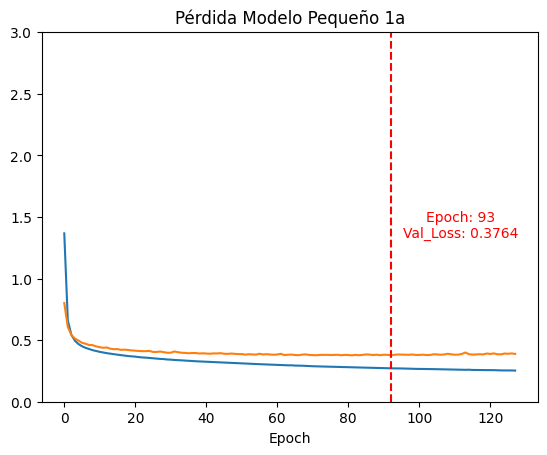

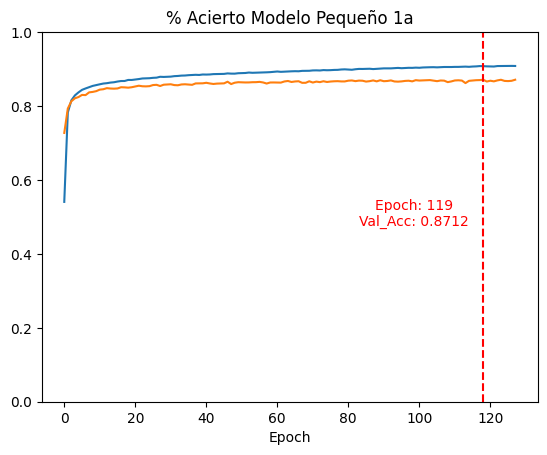

In [ ]:
XXXX = hist1a

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Pequeño 1a')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Pequeño 1a')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo pequeño 1a no muestra signos de sobreajuste (overfitting) ni infraajuste (underfitting) a simple vista, y generaliza de manera adecuada. Este modelo es mejor que su versión original en todos los aspectos. Sin embargo, en comparación con el modelo original anterior, presenta un ligero aumento en el sobreajuste, lo cual podría resolverse mediante la aplicación de técnicas de regularización.

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 32
h2 = 64

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation=mish))
red.add(keras.layers.Dense(h2, activation=mish))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='Nadam',
    metrics=['accuracy']
)

hist2a = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 2s 16ms/step - loss: 1.1234 - accuracy: 0.6271 - val_loss: 0.6838 - val_accuracy: 0.7631
Epoch 2/128
59/59 [==============================] - 1s 14ms/step - loss: 0.5734 - accuracy: 0.8073 - val_loss: 0.5457 - val_accuracy: 0.8129
Epoch 3/128
59/59 [===========

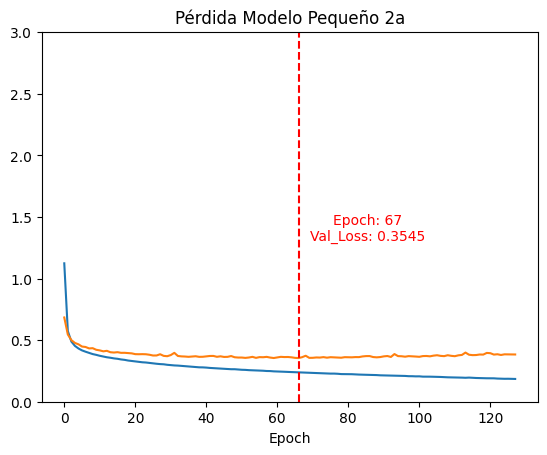

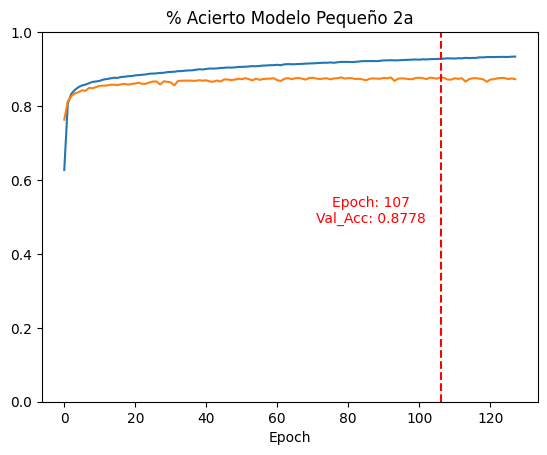

In [ ]:
XXXX = hist2a

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Pequeño 2a')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Pequeño 2a')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo pequeño 2a no muestra signos de sobreajuste (overfitting) ni infraajuste (underfitting) a simple vista, y generaliza de manera adecuada. Este modelo es mejor que su versión original en todos los aspectos. Sin embargo, en comparación con el modelo original anterior, presenta un ligero aumento en el sobreajuste, lo cual podría resolverse mediante la aplicación de técnicas de regularización. Al igual que los modelos anteriores, es ligeramente mejor que su precedesor.


Modelos medianos

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 64
h2 = 128

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation=mish))
red.add(keras.layers.Dense(h2, activation=mish))
red.add(keras.layers.Dense(h2, activation=mish))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='Nadam',
    metrics=['accuracy']
)

hist3a = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 76,362
Trainable params: 76,362
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 4s 26ms/step - loss: 0.9220 - accuracy: 0.6910 - val_loss: 0.5678 - val_accuracy: 0.7960
Epoch 2/128
59/59 [=====================

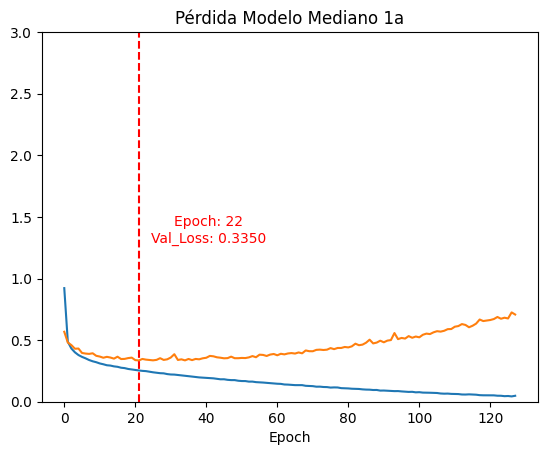

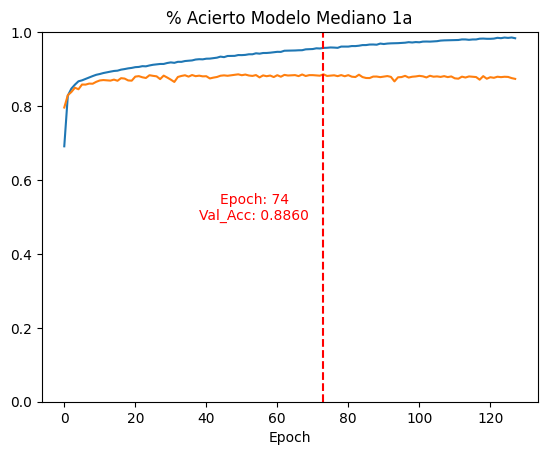

In [ ]:
XXXX = hist3a

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Mediano 1a')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Mediano 1a')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo mediano 1a muestra signos de sobreajuste (overfitting), pero no de infraajuste (underfitting), lo que resulta en una generalización menos efectiva en comparación con los modelos anteriores. Aunque este modelo podría tener una mejor precisión de validación, en términos generales, su rendimiento es inferior al de los modelos previos.

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 128
h2 = 256

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation=mish))
red.add(keras.layers.Dense(h2, activation=mish))
red.add(keras.layers.Dense(h2, activation=mish))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='Nadam',
    metrics=['accuracy']
)

hist4a = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 5s 47ms/step - loss: 0.8368 - accuracy: 0.7195 - val_loss: 0.5237 - val_accuracy: 0.8108
Epoch 2/128
59/59 [===================

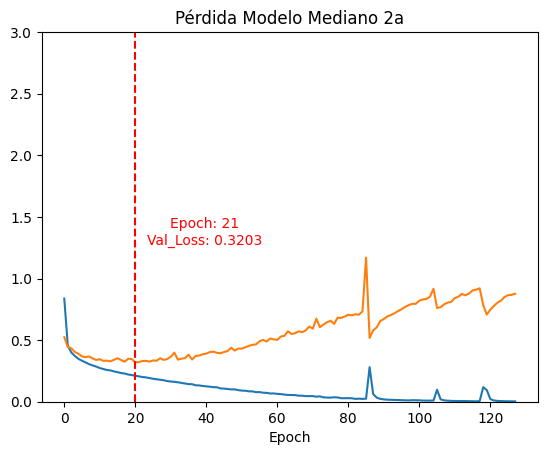

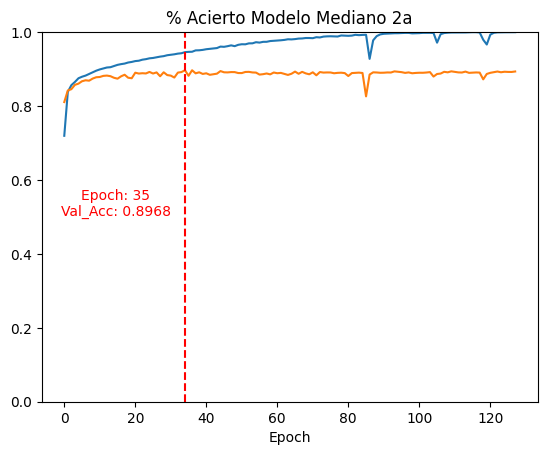

In [ ]:
XXXX = hist4a

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Mediano 2a')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Mediano 2a')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo mediano 2a muestra mucha inestabilidad y grandes signos de sobreajuste (overfitting), pero no de infraajuste (underfitting), lo que resulta en una generalización menos efectiva en comparación con los modelos anteriores. Aunque este modelo podría tener una mejor precisión de validación, en términos generales, su rendimiento es inferior al de los modelos previos.

Modelo grande

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

h1 = 256
h2 = 512
h3 = 1024

red = keras.Sequential()

red.add(keras.layers.Dense(h1, input_dim=N, activation=mish))
red.add(keras.layers.Dense(h2, activation=mish))
red.add(keras.layers.Dense(h3, activation=mish))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='Nadam',
    metrics=['accuracy']
)

hist5a = red.fit(X_train, Y_train,
        epochs=128,
        batch_size=1024,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               200960    
                                                                 
 dense_23 (Dense)            (None, 512)               131584    
                                                                 
 dense_24 (Dense)            (None, 1024)              525312    
                                                                 
 dense_25 (Dense)            (None, 10)                10250     
                                                                 
Total params: 868,106
Trainable params: 868,106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
59/59 [==============================] - 11s 142ms/step - loss: 0.7406 - accuracy: 0.7366 - val_loss: 0.4888 - val_accuracy: 0.8265
Epoch 2/128
59/59 [=================

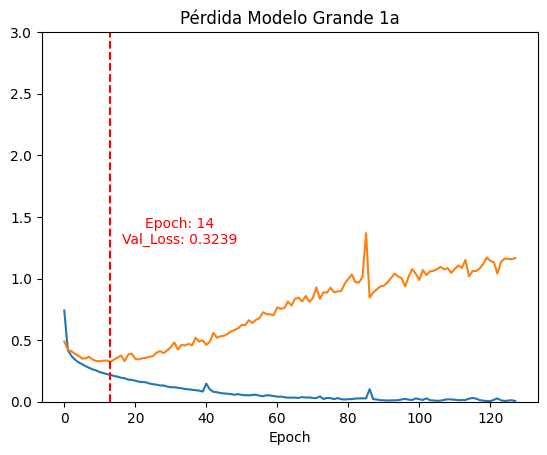

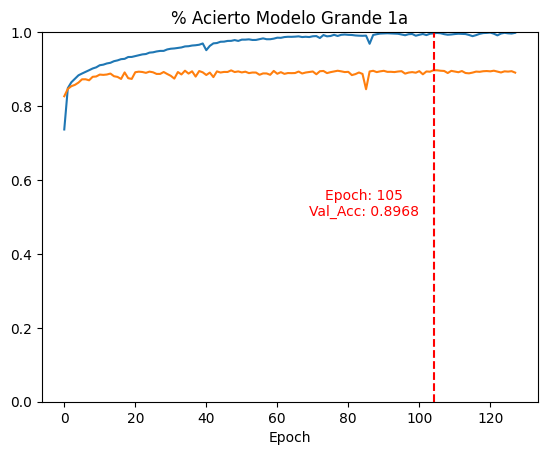

In [ ]:
XXXX = hist5a

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Grande 1a')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Grande 1a')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo mediano 2a muestra mucha inestabilidad y grandes signos de sobreajuste (overfitting), pero no de infraajuste (underfitting), lo que resulta en una generalización menos efectiva en comparación con los modelos anteriores. Aunque este modelo podría tener una mejor precisión de validación, en términos generales, su rendimiento es inferior al de los modelos previos.

En conclusión, los últimos modelos presentan un sobreajuste considerable, y solo los primeros tres pueden considerarse como una mejora en comparación con los modelos anteriores. Por lo tanto, al igual que en el caso de los modelos previos, no resulta muy beneficioso utilizar modelos de mayor tamaño en esta situación.

## 4. De los cinco modelos con arquitecturas distintas... (25 puntos)

In [ ]:
def print_summary(params, history):
    print("\nHiperparámetros:")
    print("================================")
    for key, value in params.items():
        print(f"{key}: {value}")

    avg_val_accuracy = np.max(history.history['val_accuracy'])
    print("\nMax() Validation Accuracy:")
    print("=============================")
    print(f"{avg_val_accuracy:.4f}")

Modelos Pequeños

**Modelo Pequeño 1b**

In [ ]:


# Semillas para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Hiperparámetros
layers = 2
h1 = 16
h2 = 32
activation_in = mish; activation='mish'
activation_out = 'softmax'
learning_rate = 0.0001
batch_size = 1024
epochs = 1024
regularizer = ""
l_regularization_rate = 0.00000001
dropout_rate = 0.20
optimizer = ""
callbacks = ""
batch_normalization = False

# Estrategias de Regularización
early_stop_callback = EarlyStopping(monitor='val_loss', patience=128, restore_best_weights=True); callbacks = "early_stop"

# Optimizador
opt = keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08); optimizer = "Nadam"

# Creación del modelo (Arquitectura de red)
ZZZZ = red1b = keras.Sequential()

# Capa de entrada y capa oculta 1
ZZZZ.add(keras.layers.Dense(h1, input_dim=N, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_1')); regularizer = "L1"
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_1'))

# Capa oculta 2
ZZZZ.add(keras.layers.Dense(h2, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_2'))
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_2'))

# Capa de salida
ZZZZ.add(keras.layers.Dense(C, activation=activation_out, name='output_layer'))

# Resumen de la arquitectura del modelo
ZZZZ.summary()

# Compilación del modelo (Configuración del proceso de aprendizaje)
ZZZZ.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
YYYY = hist1b = ZZZZ.fit(X_train, Y_train,
               epochs=epochs,
               batch_size=batch_size,
               validation_data=(X_test, Y_test),
               callbacks=[early_stop_callback]
              )

# Hipeparámetros del modelo y sus resultados (Para analizar y comparar)
params = {
    'Capas ocultas': layers,
    'Capa 1': h1,
    'Capa 2': h2,
    'Clases': C,
    'activation': activation,
    'output_activation': activation_out,
    'optimizer': optimizer,
    'learning_rate': learning_rate,
    'batch_size': batch_size,
    'epochs': epochs,
    'regularizer': regularizer,
    'l_regularization': l_regularization_rate,
    'dropout_rate': dropout_rate,
    'callbacks': callbacks,
    'batch_normalization': batch_normalization
}

print_summary(params, YYYY)

# Diferencia entre max accuracy y max validation accuracy para ver el grado de overfitting (Para analizar y comparar)
max_train_accuracy = np.max(YYYY.history['accuracy'])
max_val_accuracy = np.max(YYYY.history['val_accuracy'])
overfitting = max_train_accuracy - max_val_accuracy

print("\nOverfitting:")
print("=============================")
print(f"{overfitting:.4f}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 16)                12560     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                544       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1024
59/59 [==============================] 

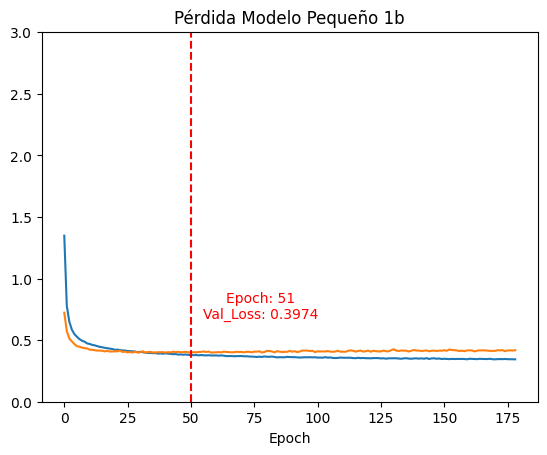

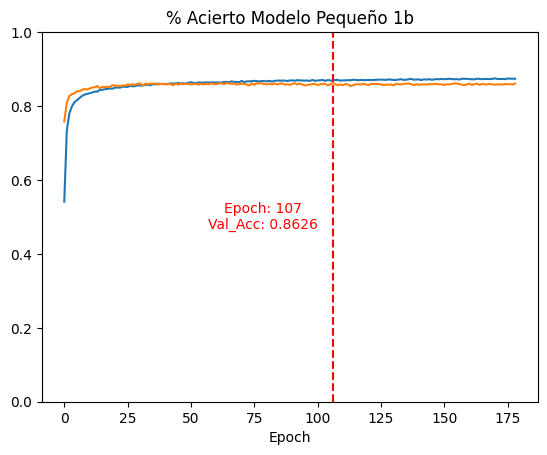

In [ ]:
XXXX = hist1b

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Pequeño 1b')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,25), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Pequeño 1b')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo pequeño 1b no muestra signos de sobreajuste (overfitting) ni infraajuste (underfitting) a simple vista, y generaliza de mejor manera que el modelo anterior a pesar de tener un validation accuracy ligeramente más bajo.

**Modelo Pequeño 2b**

In [ ]:


# Semillas para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Hiperparámetros
layers = 2
h1 = 32
h2 = 64
activation_in = mish; activation='mish'
activation_out = 'softmax'
learning_rate = 0.0001
batch_size = 1024
epochs = 1024
regularizer = ""
l_regularization_rate = 0.00000001
dropout_rate = 0.20
optimizer = ""
callbacks = ""
batch_normalization = False

# Estrategias de Regularización
early_stop_callback = EarlyStopping(monitor='val_loss', patience=128, restore_best_weights=True); callbacks = "early_stop"

# Optimizador
opt = keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08); optimizer = "Nadam"

# Creación del modelo (Arquitectura de red)
ZZZZ = red2b = keras.Sequential()

# Capa de entrada y capa oculta 1
ZZZZ.add(keras.layers.Dense(h1, input_dim=N, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_1')); regularizer = "L1"
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_1'))

# Capa oculta 2
ZZZZ.add(keras.layers.Dense(h2, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_2'))
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_2'))

# Capa de salida
ZZZZ.add(keras.layers.Dense(C, activation=activation_out, name='output_layer'))

# Resumen de la arquitectura del modelo
ZZZZ.summary()

# Compilación del modelo (Configuración del proceso de aprendizaje)
ZZZZ.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
YYYY = hist2b = ZZZZ.fit(X_train, Y_train,
               epochs=epochs,
               batch_size=batch_size,
               validation_data=(X_test, Y_test),
               callbacks=[early_stop_callback]
              )

# Hipeparámetros del modelo y sus resultados (Para analizar y comparar)
params = {
    'Capas ocultas': layers,
    'Capa 1': h1,
    'Capa 2': h2,
    'Clases': C,
    'activation': activation,
    'output_activation': activation_out,
    'optimizer': optimizer,
    'learning_rate': learning_rate,
    'batch_size': batch_size,
    'epochs': epochs,
    'regularizer': regularizer,
    'l_regularization': l_regularization_rate,
    'dropout_rate': dropout_rate,
    'callbacks': callbacks,
    'batch_normalization': batch_normalization
}

print_summary(params, YYYY)

# Diferencia entre max accuracy y max validation accuracy para ver el grado de overfitting (Para analizar y comparar)
max_train_accuracy = np.max(YYYY.history['accuracy'])
max_val_accuracy = np.max(YYYY.history['val_accuracy'])
overfitting = max_train_accuracy - max_val_accuracy

print("\nOverfitting:")
print("=============================")
print(f"{overfitting:.4f}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 32)                25120     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1024
59/59 [==============================

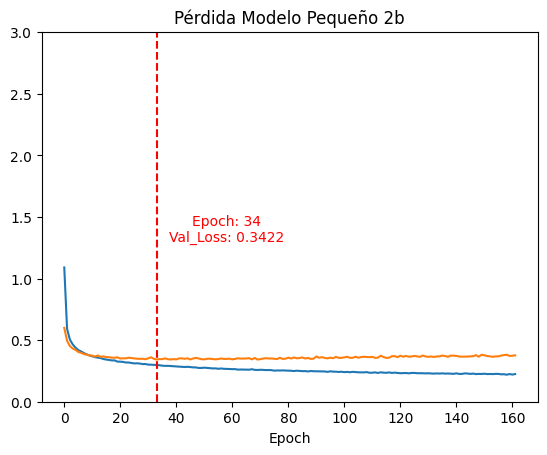

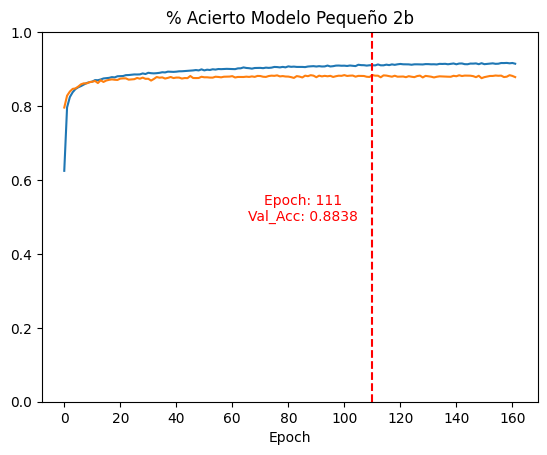

In [ ]:
XXXX = hist2b

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Pequeño 2b')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Pequeño 2b')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo pequeño 2b no muestra signos de sobreajuste (overfitting) ni infraajuste (underfitting) a simple vista, y generaliza de mejor manera que el modelo anterior a pesar de tener un validation accuracy ligeramente más bajo.

Modelos Medianos

**Modelo Mediano 1b**

In [ ]:


# Semillas para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Hiperparámetros
layers = 3
h1 = 64
h2 = 128
activation_in = mish; activation='mish'
activation_out = 'softmax'
learning_rate = 0.0001
batch_size = 1024
epochs = 1024
regularizer = ""
l_regularization_rate = 0.00000001
dropout_rate = 0.20
optimizer = ""
callbacks = ""
batch_normalization = False

# Estrategias de Regularización
early_stop_callback = EarlyStopping(monitor='val_loss', patience=128, restore_best_weights=True); callbacks = "early_stop"

# Optimizador
opt = keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08); optimizer = "Nadam"

# Creación del modelo (Arquitectura de red)
ZZZZ = red3b = keras.Sequential()

# Capa de entrada y capa oculta 1
ZZZZ.add(keras.layers.Dense(h1, input_dim=N, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_1')); regularizer = "L1"
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_1'))

# Capa oculta 2
ZZZZ.add(keras.layers.Dense(h2, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_2'))
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_2'))

# Capa oculta 3
ZZZZ.add(keras.layers.Dense(h2, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_3'))
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_3'))

# Capa de salida
ZZZZ.add(keras.layers.Dense(C, activation=activation_out, name='output_layer'))

# Resumen de la arquitectura del modelo
ZZZZ.summary()

# Compilación del modelo (Configuración del proceso de aprendizaje)
ZZZZ.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
YYYY = hist3b = ZZZZ.fit(X_train, Y_train,
               epochs=epochs,
               batch_size=batch_size,
               validation_data=(X_test, Y_test),
               callbacks=[early_stop_callback]
              )

# Hipeparámetros del modelo y sus resultados (Para analizar y comparar)
params = {
    'Capas ocultas': layers,
    'Capa 1': h1,
    'Capa 2': h2,
    'Clases': C,
    'activation': activation,
    'output_activation': activation_out,
    'optimizer': optimizer,
    'learning_rate': learning_rate,
    'batch_size': batch_size,
    'epochs': epochs,
    'regularizer': regularizer,
    'l_regularization': l_regularization_rate,
    'dropout_rate': dropout_rate,
    'callbacks': callbacks,
    'batch_normalization': batch_normalization
}

print_summary(params, YYYY)

# Diferencia entre max accuracy y max validation accuracy para ver el grado de overfitting (Para analizar y comparar)
max_train_accuracy = np.max(YYYY.history['accuracy'])
max_val_accuracy = np.max(YYYY.history['val_accuracy'])
overfitting = max_train_accuracy - max_val_accuracy

print("\nOverfitting:")
print("=============================")
print(f"{overfitting:.4f}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 hidden_layer_3 (Dense)      (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 10)               

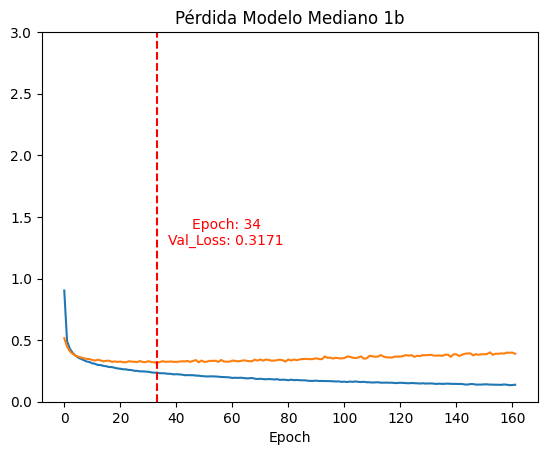

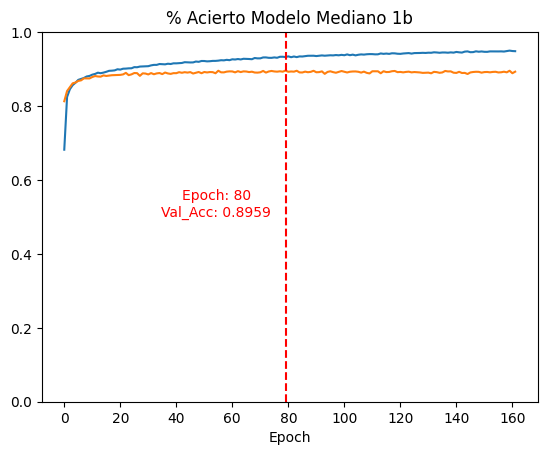

In [ ]:
XXXX = hist3b

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Mediano 1b')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Mediano 1b')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo mediano 1b no muestra signos de sobreajuste (overfitting) ni infraajuste (underfitting) a simple vista, y generaliza de mejor manera que el modelo anterior a pesar de tener un validation accuracy ligeramente más bajo.

**Modelo Mediano 2b**

In [ ]:


# Semillas para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Hiperparámetros
layers = 3
h1 = 128
h2 = 256
activation_in = mish; activation='mish'
activation_out = 'softmax'
learning_rate = 0.0001
batch_size = 1024
epochs = 1024
regularizer = ""
l_regularization_rate = 0.00000001
dropout_rate = 0.20
optimizer = ""
callbacks = ""
batch_normalization = False

# Estrategias de Regularización
early_stop_callback = EarlyStopping(monitor='val_loss', patience=128, restore_best_weights=True); callbacks = "early_stop"

# Optimizador
opt = keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08); optimizer = "Nadam"

# Creación del modelo (Arquitectura de red)
ZZZZ = red4b = keras.Sequential()

# Capa de entrada y capa oculta 1
ZZZZ.add(keras.layers.Dense(h1, input_dim=N, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_1')); regularizer = "L1"
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_1'))

# Capa oculta 2
ZZZZ.add(keras.layers.Dense(h2, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_2'))
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_2'))

# Capa oculta 3
ZZZZ.add(keras.layers.Dense(h2, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_3'))
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_3'))

# Capa de salida
ZZZZ.add(keras.layers.Dense(C, activation=activation_out, name='output_layer'))

# Resumen de la arquitectura del modelo
ZZZZ.summary()

# Compilación del modelo (Configuración del proceso de aprendizaje)
ZZZZ.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
YYYY = hist4b = ZZZZ.fit(X_train, Y_train,
               epochs=epochs,
               batch_size=batch_size,
               validation_data=(X_test, Y_test),
               callbacks=[early_stop_callback]
              )

# Hipeparámetros del modelo y sus resultados (Para analizar y comparar)
params = {
    'Capas ocultas': layers,
    'Capa 1': h1,
    'Capa 2': h2,
    'Clases': C,
    'activation': activation,
    'output_activation': activation_out,
    'optimizer': optimizer,
    'learning_rate': learning_rate,
    'batch_size': batch_size,
    'epochs': epochs,
    'regularizer': regularizer,
    'l_regularization': l_regularization_rate,
    'dropout_rate': dropout_rate,
    'callbacks': callbacks,
    'batch_normalization': batch_normalization
}

print_summary(params, YYYY)

# Diferencia entre max accuracy y max validation accuracy para ver el grado de overfitting (Para analizar y comparar)
max_train_accuracy = np.max(YYYY.history['accuracy'])
max_val_accuracy = np.max(YYYY.history['val_accuracy'])
overfitting = max_train_accuracy - max_val_accuracy

print("\nOverfitting:")
print("=============================")
print(f"{overfitting:.4f}")

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 hidden_layer_3 (Dense)      (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 10)              

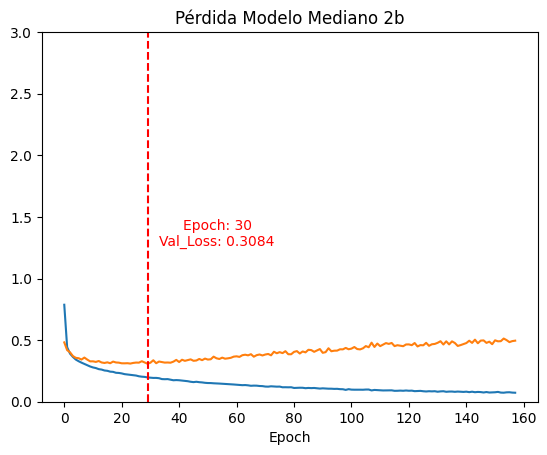

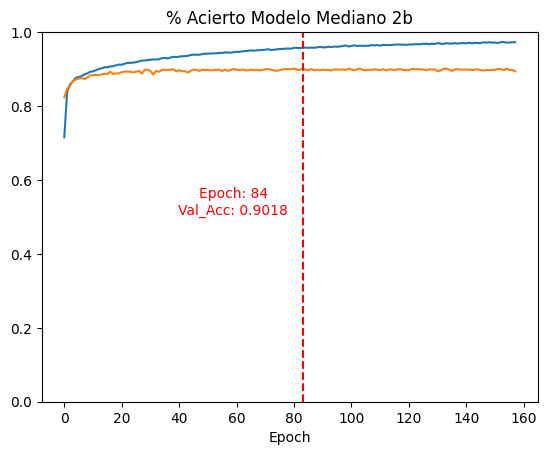

In [ ]:
XXXX = hist4b

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Mediano 2b')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Mediano 2b')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo mediano 2b no muestra signos de sobreajuste (overfitting) ni infraajuste (underfitting) a simple vista, y generaliza de mejor manera que el modelo anterior a pesar de tener un validation accuracy ligeramente más bajo.

Modelo grande

**Modelo Grande 1b**

In [ ]:


# Semillas para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Hiperparámetros
layers = 3
h1 = 256
h2 = 512
h3 = 1024
activation_in = mish; activation='mish'
activation_out = 'softmax'
learning_rate = 0.0001
batch_size = 1024
epochs = 1024
regularizer = ""
l_regularization_rate = 0.00000001
dropout_rate = 0.20
optimizer = ""
callbacks = ""
batch_normalization = False

# Estrategias de Regularización
early_stop_callback = EarlyStopping(monitor='val_loss', patience=128, restore_best_weights=True); callbacks = "early_stop"

# Optimizador
opt = keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08); optimizer = "Nadam"

# Creación del modelo (Arquitectura de red)
ZZZZ = red5b = keras.Sequential()

# Capa de entrada y capa oculta 1
ZZZZ.add(keras.layers.Dense(h1, input_dim=N, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_1')); regularizer = "L1"
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_1'))

# Capa oculta 2
ZZZZ.add(keras.layers.Dense(h2, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_2'))
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_2'))

# Capa oculta 3
ZZZZ.add(keras.layers.Dense(h3, activation=activation_in, kernel_regularizer=regularizers.l1(l=l_regularization_rate), name='hidden_layer_3'))
ZZZZ.add(keras.layers.Dropout(dropout_rate, name='dropout_3'))

# Capa de salida
ZZZZ.add(keras.layers.Dense(C, activation=activation_out, name='output_layer'))

# Resumen de la arquitectura del modelo
ZZZZ.summary()

# Compilación del modelo (Configuración del proceso de aprendizaje)
ZZZZ.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
YYYY = hist5b = ZZZZ.fit(X_train, Y_train,
               epochs=epochs,
               batch_size=batch_size,
               validation_data=(X_test, Y_test),
               callbacks=[early_stop_callback]
              )

# Hipeparámetros del modelo y sus resultados (Para analizar y comparar)
params = {
    'Capas ocultas': layers,
    'Capa 1': h1,
    'Capa 2': h2,
    'Clases': C,
    'activation': activation,
    'output_activation': activation_out,
    'optimizer': optimizer,
    'learning_rate': learning_rate,
    'batch_size': batch_size,
    'epochs': epochs,
    'regularizer': regularizer,
    'l_regularization': l_regularization_rate,
    'dropout_rate': dropout_rate,
    'callbacks': callbacks,
    'batch_normalization': batch_normalization
}

print_summary(params, YYYY)

# Diferencia entre max accuracy y max validation accuracy para ver el grado de overfitting (Para analizar y comparar)
max_train_accuracy = np.max(YYYY.history['accuracy'])
max_val_accuracy = np.max(YYYY.history['val_accuracy'])
overfitting = max_train_accuracy - max_val_accuracy

print("\nOverfitting:")
print("=============================")
print(f"{overfitting:.4f}")

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 hidden_layer_3 (Dense)      (None, 1024)              525312    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 output_layer (Dense)        (None, 10)              

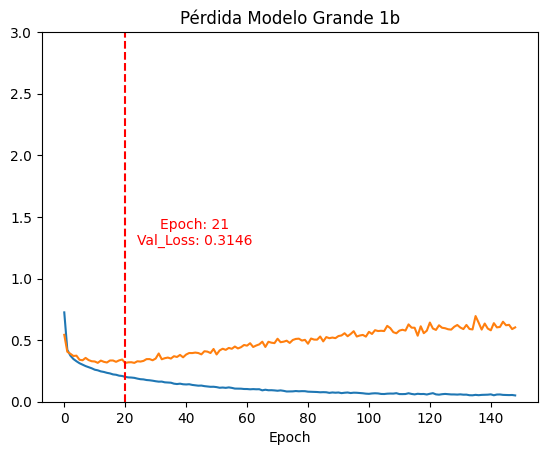

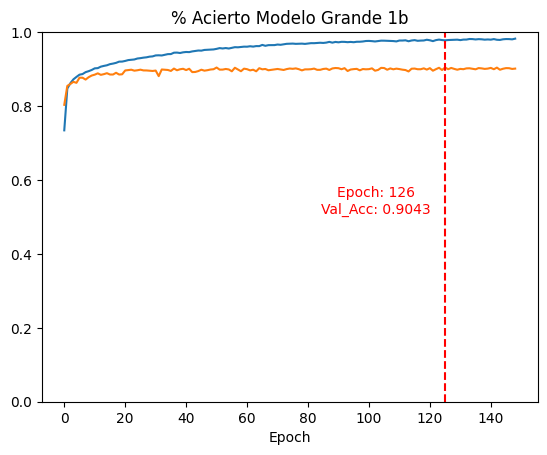

In [ ]:
XXXX = hist5b

# Graficar pérdida
plt.plot(XXXX.history['loss'])
plt.plot(XXXX.history['val_loss'])
plt.title('Pérdida Modelo Grande 1b')
plt.xlabel('Epoch')
plt.ylim(0, 3)  # Ajustar la escala del eje Y de 0 a 3

min_val_loss_index = np.argmin(XXXX.history['val_loss'])
min_val_loss = np.min(XXXX.history['val_loss'])

plt.axvline(x=min_val_loss_index, color='r', linestyle='--')  # Agregar línea roja en el punto más bajo de la pérdida de validación
plt.annotate(f"Epoch: {min_val_loss_index+1}\nVal_Loss: {min_val_loss:.4f}", (min_val_loss_index, min_val_loss), textcoords="offset points", xytext=(50,85), ha='center', color='r')

plt.show()


# Graficar precisión
plt.plot(XXXX.history['accuracy'])
plt.plot(XXXX.history['val_accuracy'])
plt.title('% Acierto Modelo Grande 1b')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Ajustar la escala del eje Y de 0 a 1 (0% a 100%)

max_val_accuracy_index = np.argmax(XXXX.history['val_accuracy'])
max_val_accuracy = np.max(XXXX.history['val_accuracy'])

plt.axvline(x=max_val_accuracy_index, color='r', linestyle='--')  # Agregar línea roja en el punto más alto logrado
plt.annotate(f"Epoch: {max_val_accuracy_index+1}\nVal_Acc: {max_val_accuracy:.4f}", (max_val_accuracy_index, max_val_accuracy), textcoords="offset points", xytext=(-50,-105), ha='center', color='r')

plt.show()

En general, el Modelo grande 1b no muestra signos de sobreajuste (overfitting) ni infraajuste (underfitting) a simple vista, y generaliza de mejor manera que el modelo anterior a pesar de tener un validation accuracy ligeramente más bajo.
Aun así, este modelo tiene mucho más overfitting que el resto y en general los más pequeños siguen siendo mejores modelos.

En conclusión, los resultados son mejores pero se mantiene el hecho de que los modelos pequeños son superiores en generalización en este caso.

## 5. De las 5 arquitecturas, tome las tres donde obtuvo mejores resultados... (15 puntos)

In [ ]:
import numpy as np

**Modelo Pequeño 1b**

313/313 [==============================] - 1s 2ms/step
Precisión del modelo pequeño 1b en el conjunto de prueba: 85.86%


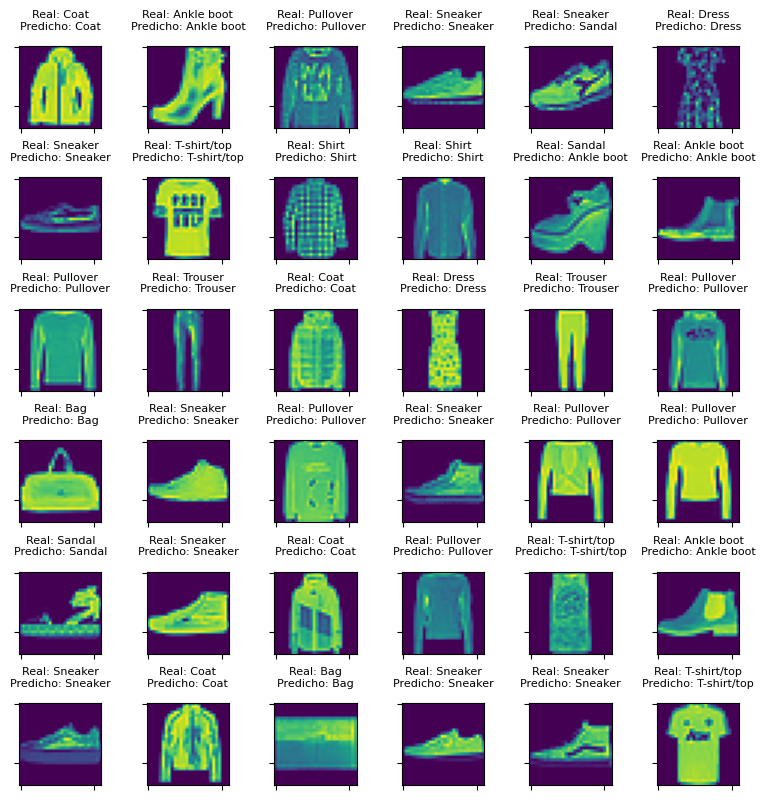

In [ ]:


# Realizar predicciones en el conjunto de prueba
Y_pred = red1b.predict(X_test)

# Convertir las predicciones en clases
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convertir las etiquetas de prueba en clases
Y_test_classes = np.argmax(Y_test, axis=1)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = np.mean(Y_pred_classes == Y_test_classes)
print("Precisión del modelo pequeño 1b en el conjunto de prueba: {:.2%}".format(accuracy))

# Visualizar algunas predicciones y sus etiquetas reales
h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))
plt.subplots_adjust(hspace=0.6)  # Ajustar el espacio entre las imágenes

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(imgs_test))
        real_label = nombres[Y_test_classes[ex]]
        predicted_label = nombres[Y_pred_classes[ex]]
        axs[i, j].set_title("Real: {}\nPredicho: {}".format(real_label, predicted_label),
                            y=1.1, fontsize=8)  # Cambiar el tamaño del texto a 8 y mover el título hacia arriba
        axs[i, j].grid(False)
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        axs[i, j].imshow(imgs_test[ex])

plt.show()



**Modelo Pequeño 2b**

313/313 [==============================] - 1s 2ms/step
Precisión del modelo pequeño 2b en el conjunto de prueba: 87.85%


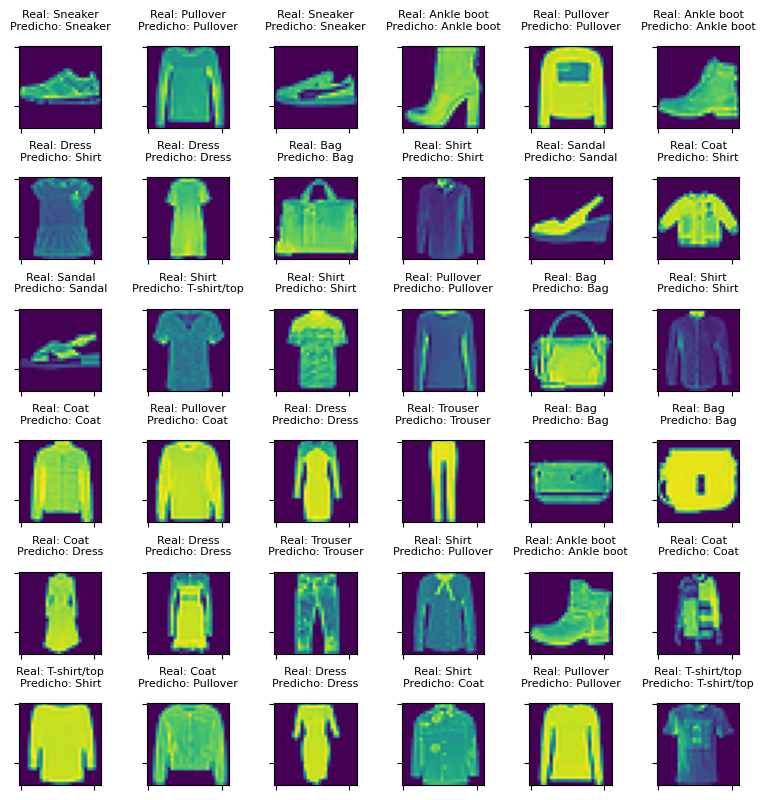

In [ ]:

# Realizar predicciones en el conjunto de prueba
Y_pred = red2b.predict(X_test)

# Convertir las predicciones en clases
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convertir las etiquetas de prueba en clases
Y_test_classes = np.argmax(Y_test, axis=1)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = np.mean(Y_pred_classes == Y_test_classes)
print("Precisión del modelo pequeño 2b en el conjunto de prueba: {:.2%}".format(accuracy))

# Visualizar algunas predicciones y sus etiquetas reales
h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))
plt.subplots_adjust(hspace=0.6)  # Ajustar el espacio entre las imágenes

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(imgs_test))
        real_label = nombres[Y_test_classes[ex]]
        predicted_label = nombres[Y_pred_classes[ex]]
        axs[i, j].set_title("Real: {}\nPredicho: {}".format(real_label, predicted_label),
                            y=1.1, fontsize=8)  # Cambiar el tamaño del texto a 8 y mover el título hacia arriba
        axs[i, j].grid(False)
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        axs[i, j].imshow(imgs_test[ex])

plt.show()



**Modelo Mediano 1b**

313/313 [==============================] - 1s 2ms/step
Precisión del modelo mediano 1b en el conjunto de prueba: 88.83%


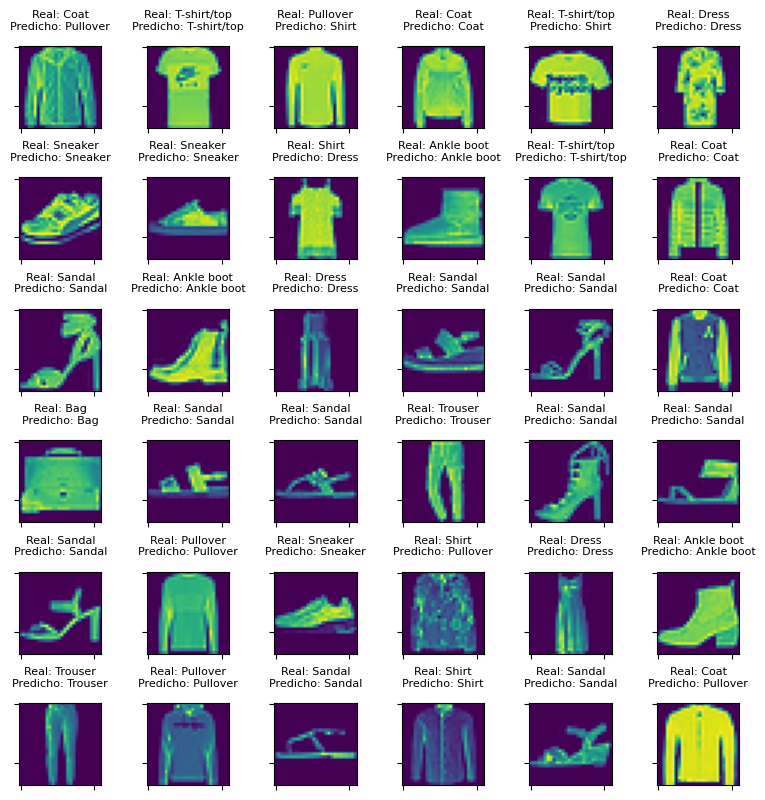

In [ ]:

# Realizar predicciones en el conjunto de prueba
Y_pred = red3b.predict(X_test)

# Convertir las predicciones en clases
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convertir las etiquetas de prueba en clases
Y_test_classes = np.argmax(Y_test, axis=1)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = np.mean(Y_pred_classes == Y_test_classes)
print("Precisión del modelo mediano 1b en el conjunto de prueba: {:.2%}".format(accuracy))

# Visualizar algunas predicciones y sus etiquetas reales
h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))
plt.subplots_adjust(hspace=0.6)  # Ajustar el espacio entre las imágenes

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(imgs_test))
        real_label = nombres[Y_test_classes[ex]]
        predicted_label = nombres[Y_pred_classes[ex]]
        axs[i, j].set_title("Real: {}\nPredicho: {}".format(real_label, predicted_label),
                            y=1.1, fontsize=8)  # Cambiar el tamaño del texto a 8 y mover el título hacia arriba
        axs[i, j].grid(False)
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        axs[i, j].imshow(imgs_test[ex])

plt.show()



## 6. De los tres mejores modelos que obtuvo en el punto anterior, diga cual modelo es más confiable... (10 puntos)

### Resultados:

Modelo pequeño 1b:



Precisión de validación: 0.8626
Sobreajuste: 0.0124



Modelo pequeño 2b:



Precisión de validación: 0.8838
Sobreajuste: 0.0329



Modelo mediano 1b:



Precisión de validación: 0.8959
Sobreajuste: 0.0540



El Modelo mediano 1b tiene la mayor precisión de validación (0.8959), lo que indica un mejor rendimiento en datos no vistos. Sin embargo, también tiene el mayor grado de sobreajuste (0.0540), lo que podría indicar un ajuste excesivo a los datos de entrenamiento y, posiblemente, una generalización menos efectiva en datos nuevos y diferentes.

Por otro lado, el Modelo pequeño 1b tiene la menor precisión de validación (0.8626), pero también el menor grado de sobreajuste (0.0124), lo que sugiere una buena capacidad de generalización.

Dado que la confiabilidad de un modelo implica un equilibrio entre el rendimiento en datos no vistos y la capacidad de generalización, el Modelo pequeño 1b puede considerarse como el más confiable de los tres, a pesar de tener una precisión de validación ligeramente menor. Esto se debe a que su menor sobreajuste indica una mejor capacidad para generalizar a nuevos datos, reduciendo el riesgo de un rendimiento deficiente en situaciones reales.

### Conclusión

En este trabajo, se llevaron a cabo diversas etapas para desarrollar y mejorar modelos de redes neuronales aplicados al conjunto de datos Fashion-MNIST. Inicialmente, se crearon cinco modelos con distintas arquitecturas y se analizaron sus métricas de rendimiento y función de pérdida. Los primeros modelos presentaron un validation accuracy de 80% aproximadamente, lo cuál podía ser mejorado y nos llevó a explorar cambios en los hiperparámetros, como la función de activación y los algoritmos de optimización.

Al cambiar la función de activación de ReLU a Mish y el optimizador de SGD a Nadam, se logró aumentar la precisión de validación, pero también se observó un mayor sobreajuste. Para abordar este problema, se implementaron técnicas de regularización, como el uso de Dropout, regularización L1 y Early Stopping.

De los cinco modelos iniciales, los dos pequeños y el primer modelo mediano demostraron ser los mejores en términos de rendimiento y capacidad de generalización. Los modelos más grandes presentaron un sobreajuste excesivo y, por lo tanto, se descartaron.

Al analizar los hiperparámetros de los modelos seleccionados, se observa que se utilizó la función de activación Mish, el optimizador Nadam con una tasa de aprendizaje de 0.0001, un tamaño de lote de 1024, 1024 épocas, regularización L1 con un valor de 1e-08 y una tasa de abandono del 20%. Además, se empleó la técnica de Early Stopping como callback.

La selección del modelo más confiable se basó en un equilibrio entre la precisión de validación y la capacidad de generalización. De los tres mejores modelos, el Modelo pequeño 1b demostró ser el más confiable, con una menor tendencia al sobreajuste.

En conclusión, este trabajo muestra la importancia de ajustar cuidadosamente los hiperparámetros y aplicar técnicas de regularización al diseñar modelos de redes neuronales. La selección de la arquitectura y los hiperparámetros adecuados puede marcar una diferencia significativa en el rendimiento y la confiabilidad del modelo. Además, se destaca que, en algunos casos, modelos más pequeños y menos complejos pueden ofrecer un rendimiento sólido y una mejor capacidad de generalización en comparación con sus contrapartes más grandes.




